<a href="https://colab.research.google.com/github/Hdavid1123/Interferometria_AstropIII/blob/master/Tranformada_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def analizar_senal(csv_path, sep=",", header="infer"):

    df = pd.read_csv(csv_path, sep=sep, header=header)
    t = df.iloc[:, 0].values     # primera columna: tiempo
    x = df.iloc[:, 1].values     # segunda columna: señal

    plt.figure(figsize=(12, 4))
    plt.plot(t, x)
    plt.title("Señal en el dominio del tiempo")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- FFT ---
    dt = np.mean(np.diff(t))
    fs = 1.0 / dt

    N = len(x)
    X = np.fft.rfft(x)
    freqs = np.fft.rfftfreq(N, d=dt)
    amp = np.abs(X)

    amp_no_dc = amp.copy()
    amp_no_dc[0] = 0.0

    idx_max = np.argmax(amp_no_dc)
    f_dom = freqs[idx_max]

    print(f"Frecuencia dominante: {f_dom:.6f} Hz")

    plt.figure(figsize=(12, 4))
    plt.plot(freqs, amp)
    plt.title("Espectro de la señal (FFT)")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X(f)|")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return

# ***do***

## calibrate_do1

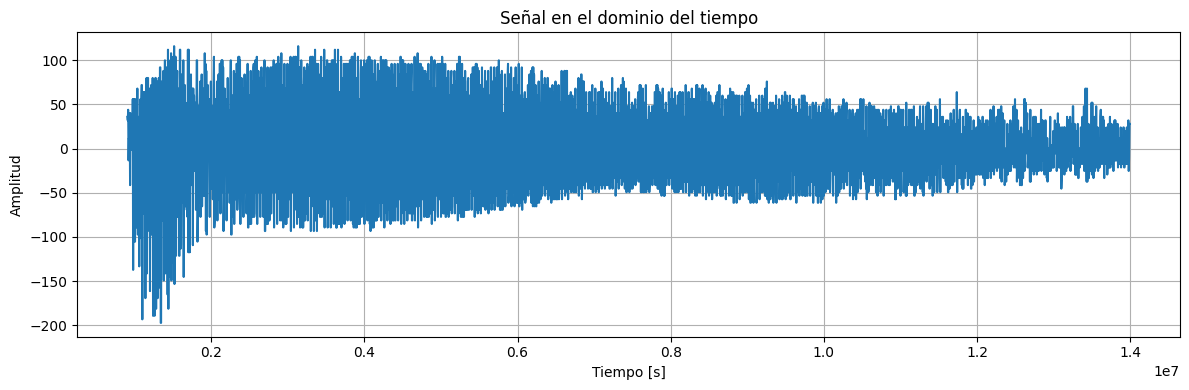

Frecuencia dominante: 0.000100 Hz


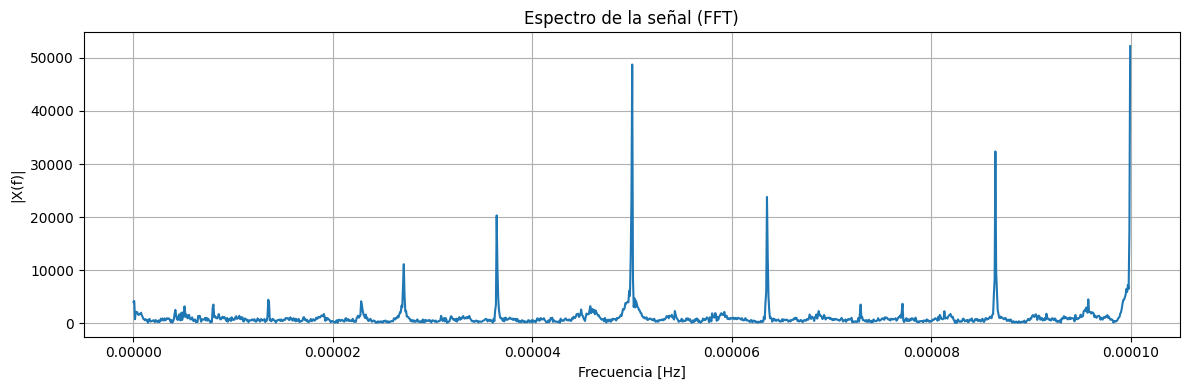

In [10]:
analizar_senal("/content/calibrate_do1.csv")

##calibrate_do2

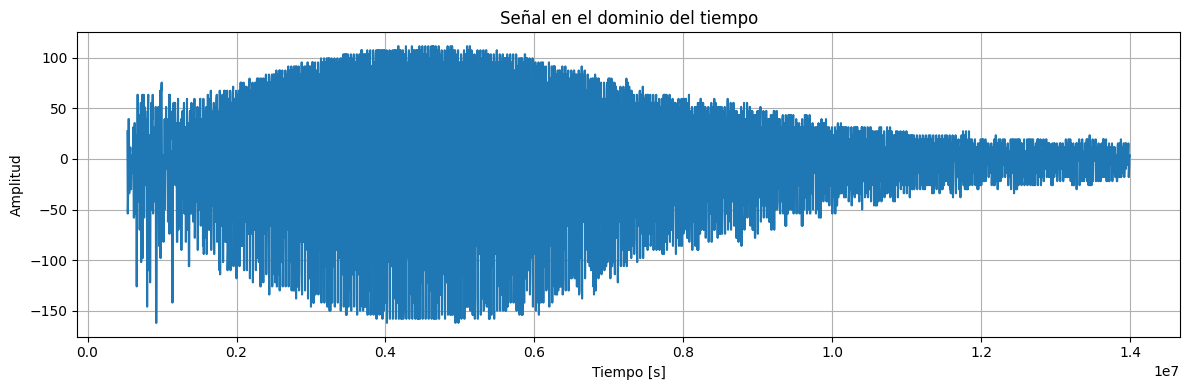

Frecuencia dominante: 0.000100 Hz


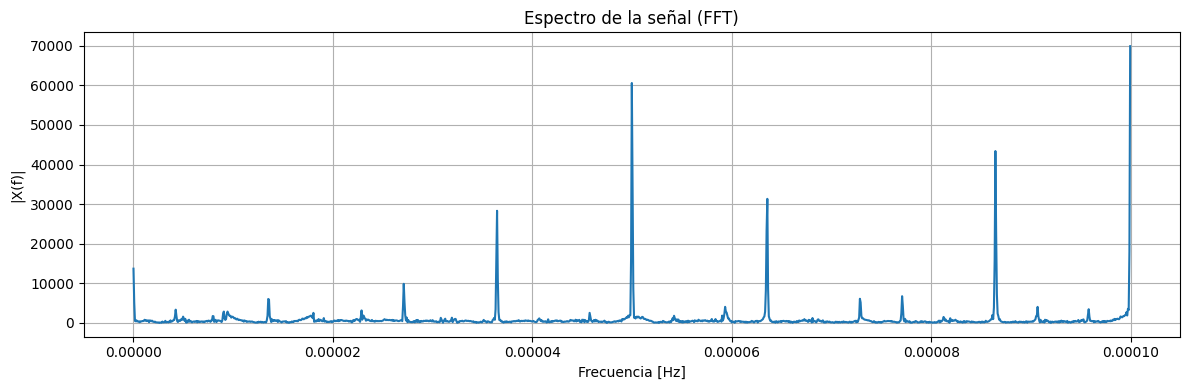

In [11]:
analizar_senal("/content/calibrate_do2.csv")

##calibrate_do3

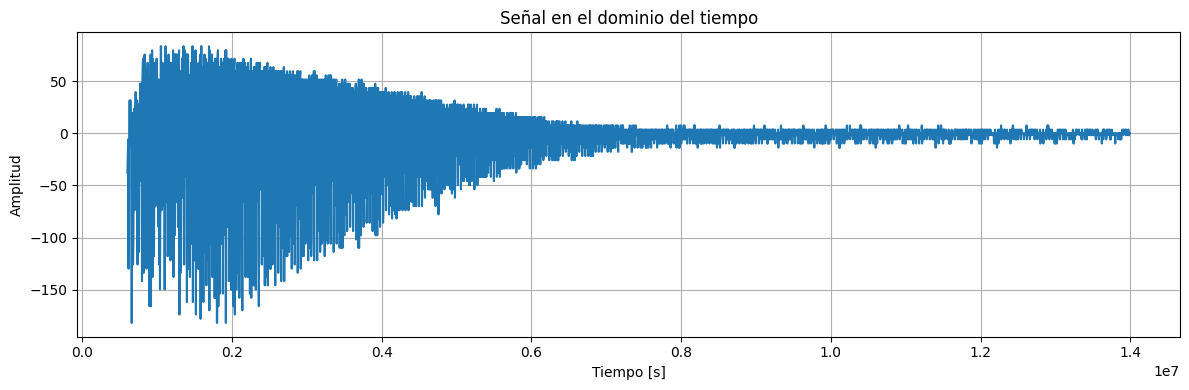

Frecuencia dominante: 0.000100 Hz


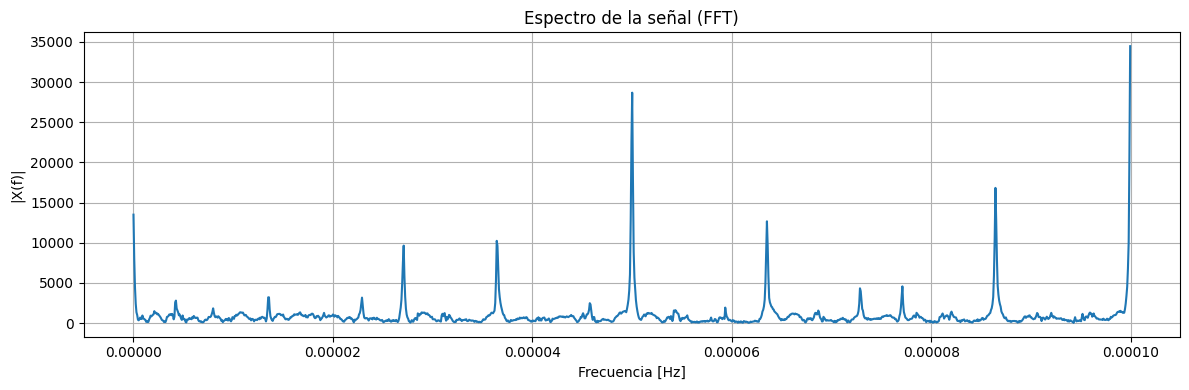

In [12]:
analizar_senal("/content/calibrate_do3.csv")

##calibrate_do4

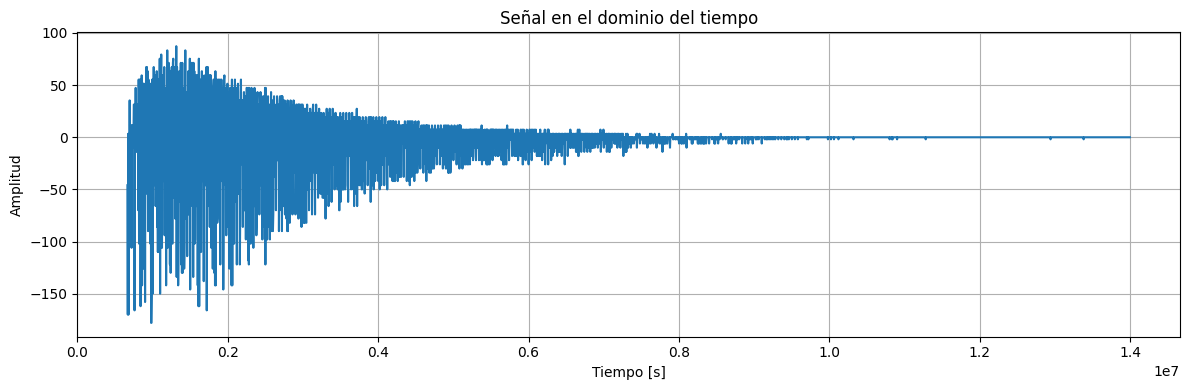

Frecuencia dominante: 0.000100 Hz


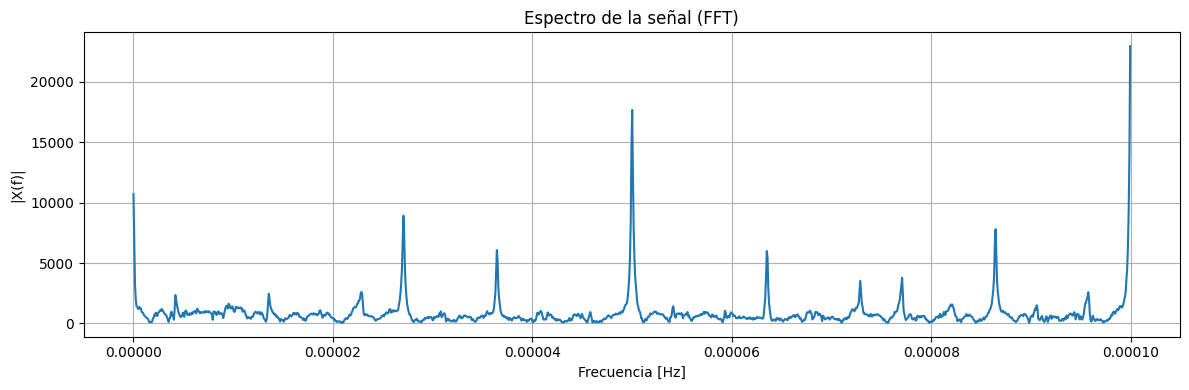

In [13]:
analizar_senal("/content/calibrate_do4.csv")

##calibrate_do5

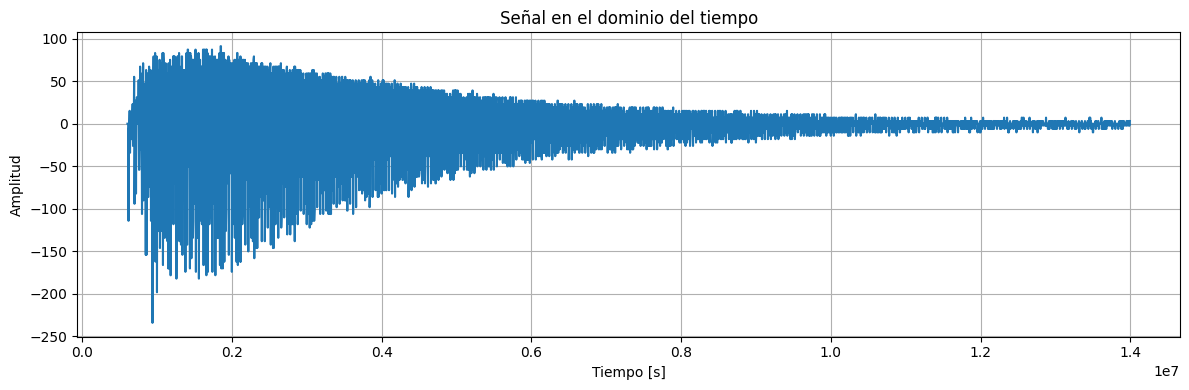

Frecuencia dominante: 0.000100 Hz


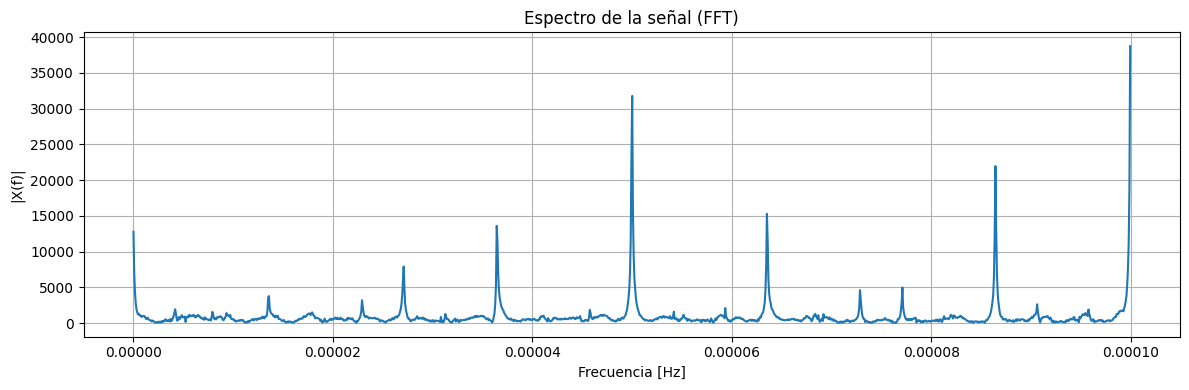

In [14]:
analizar_senal("/content/calibrate_do5.csv")

##calibrate_do6

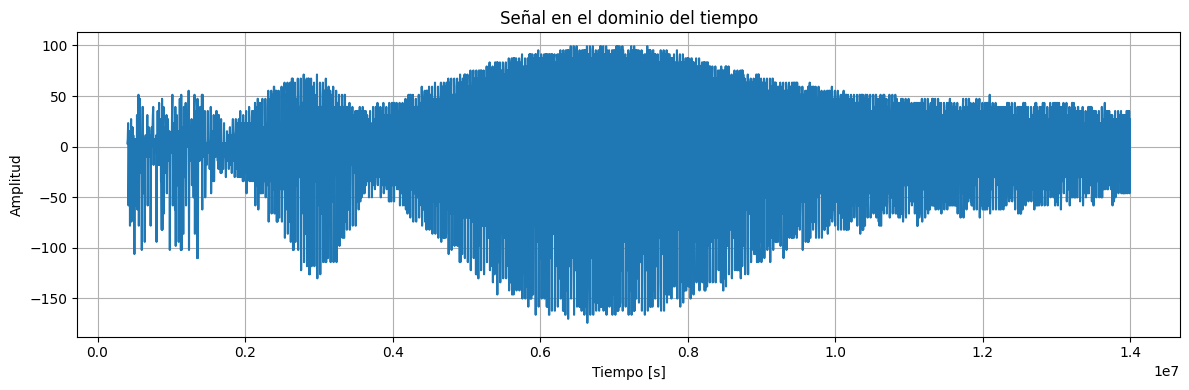

Frecuencia dominante: 0.000100 Hz


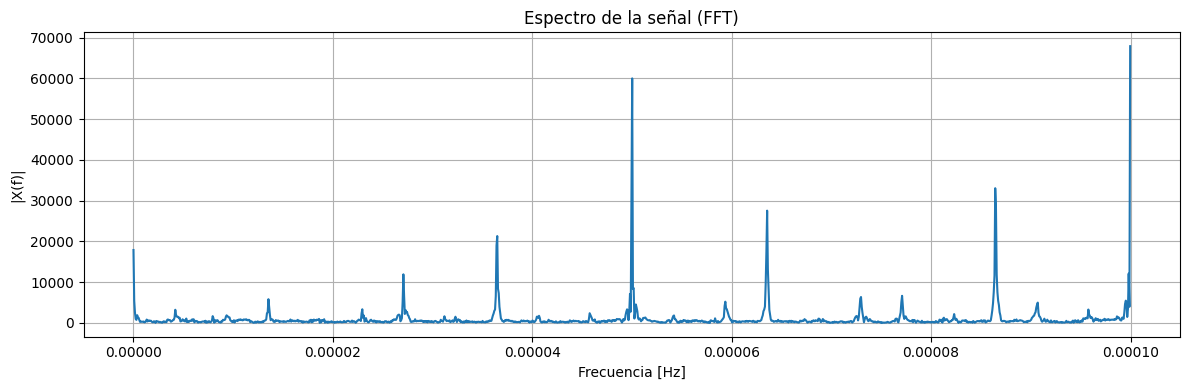

In [15]:
analizar_senal("/content/calibrate_do6.csv")

# ***la***

## calibrate_la1

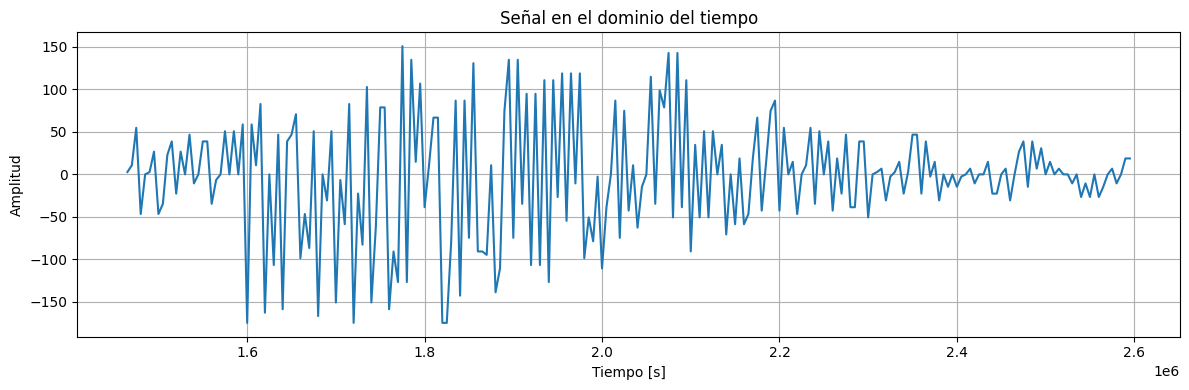

Frecuencia dominante: 0.000100 Hz


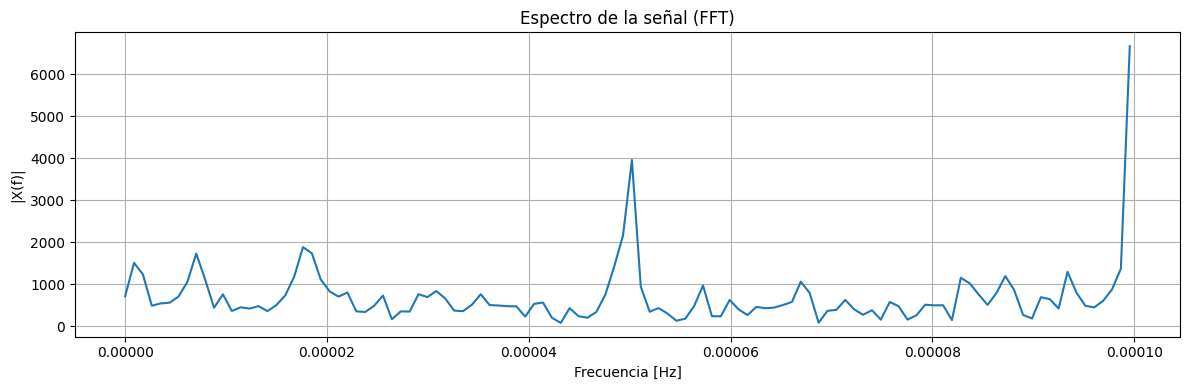

In [16]:
analizar_senal("/content/calibrate_la1.csv")

# ***la_sub***

## calibrate_la2

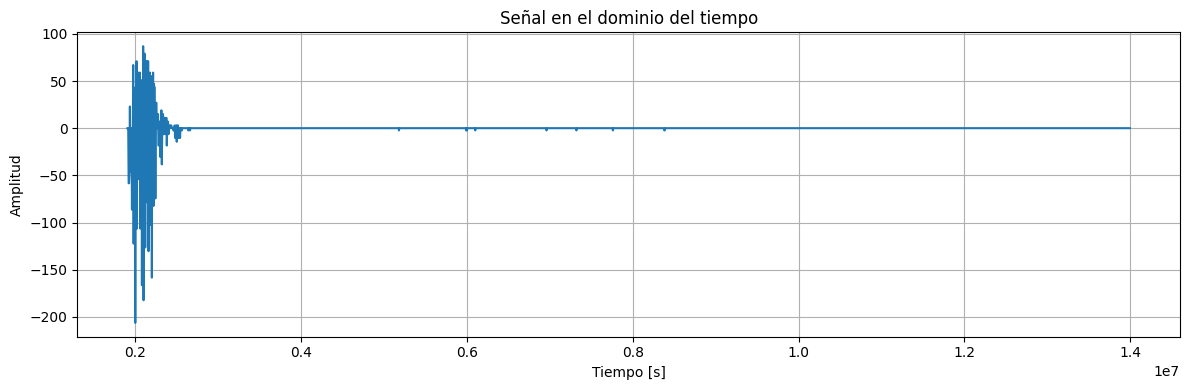

Frecuencia dominante: 0.000100 Hz


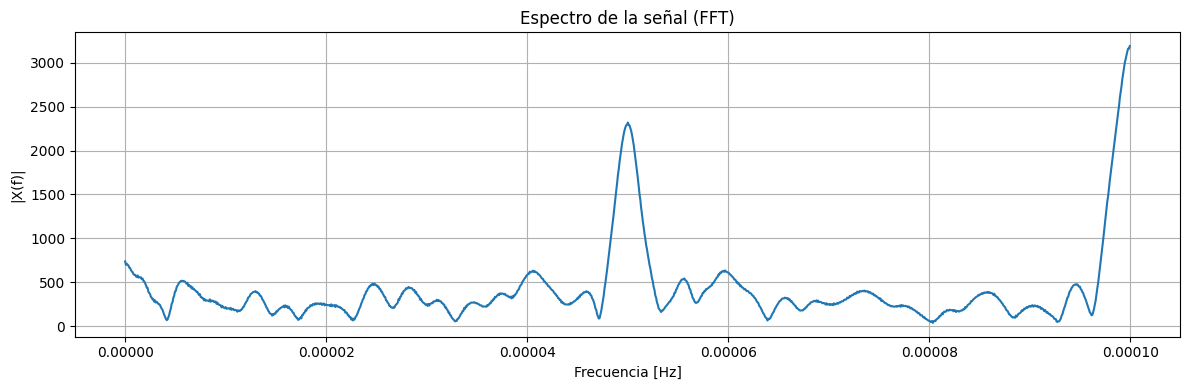

In [17]:
analizar_senal("/content/calibrate_la2.csv")

## calibrate_la3

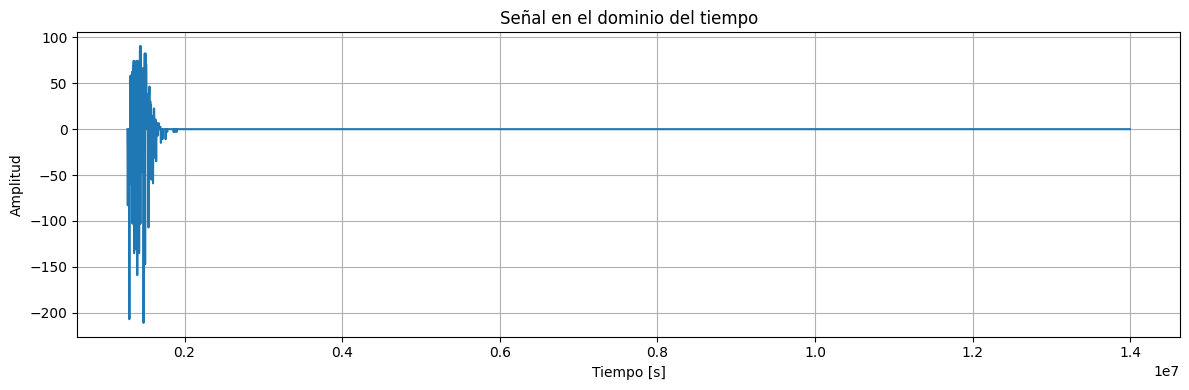

Frecuencia dominante: 0.000100 Hz


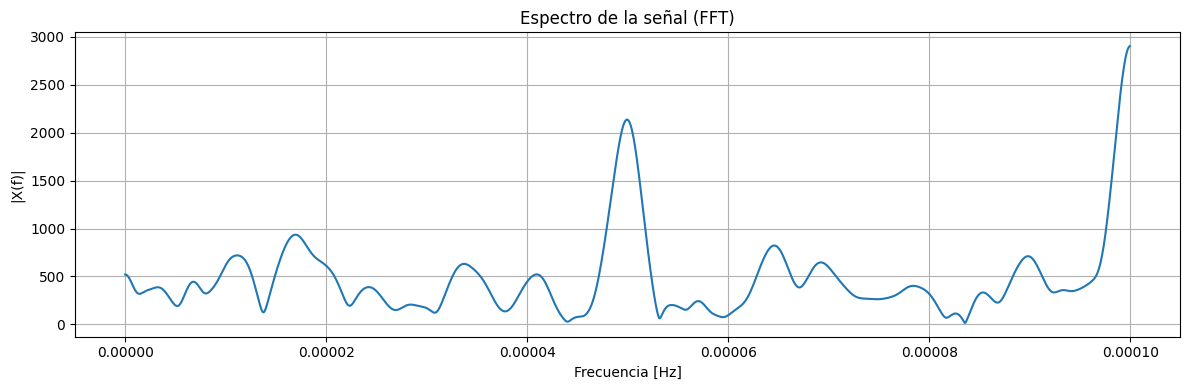

In [18]:
analizar_senal("/content/calibrate_la3.csv")

## calibrate_la4

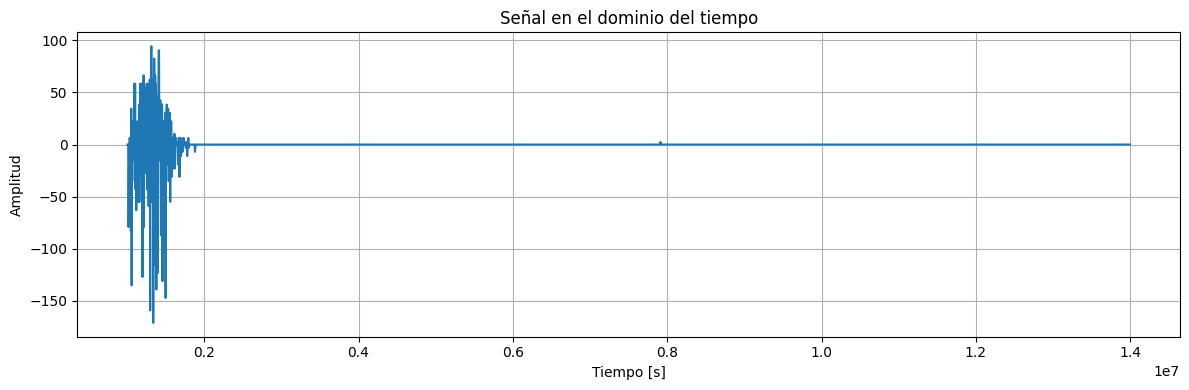

Frecuencia dominante: 0.000100 Hz


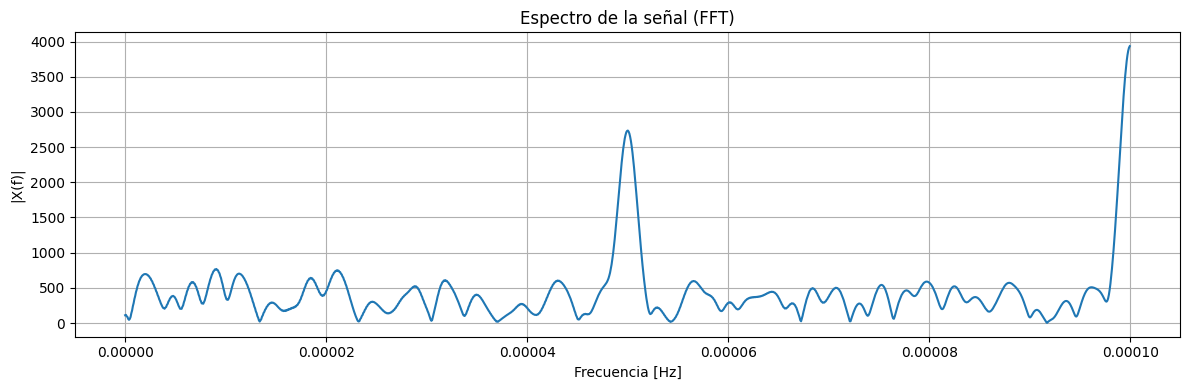

In [19]:
analizar_senal("/content/calibrate_la4.csv")

## calibrate_la5

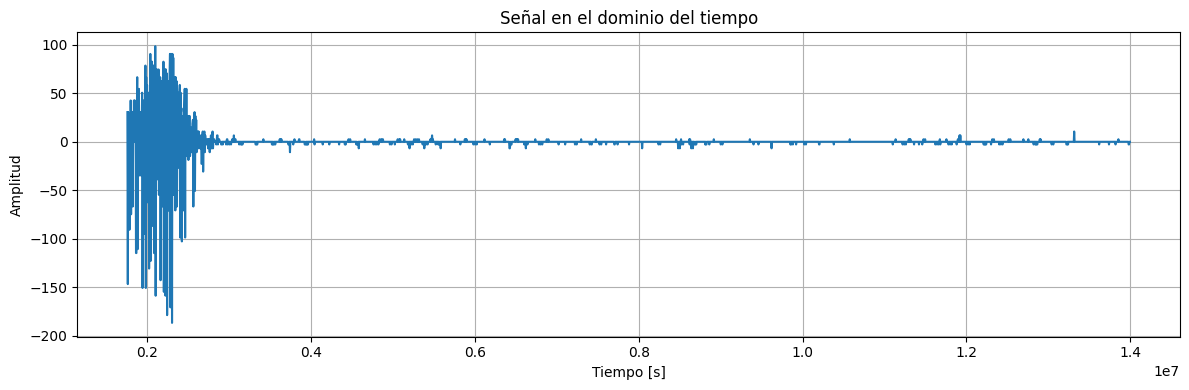

Frecuencia dominante: 0.000100 Hz


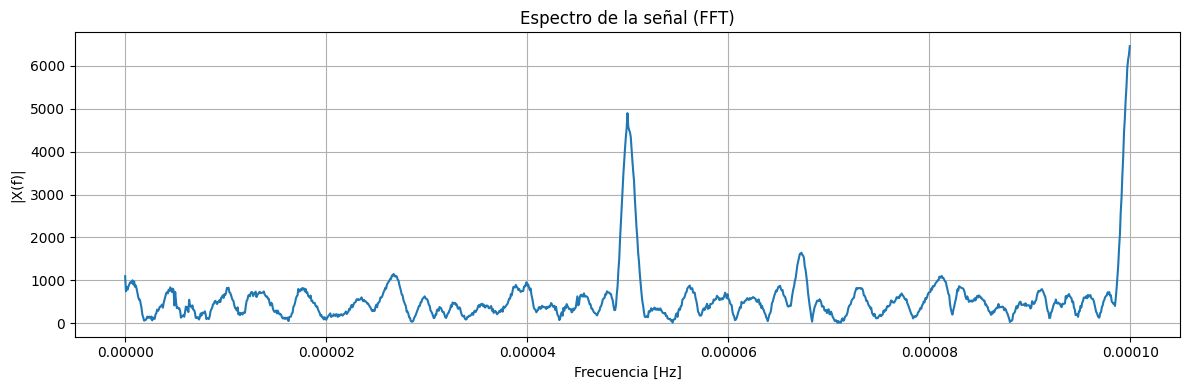

In [20]:
analizar_senal("/content/calibrate_la5.csv")

## substracted_la1

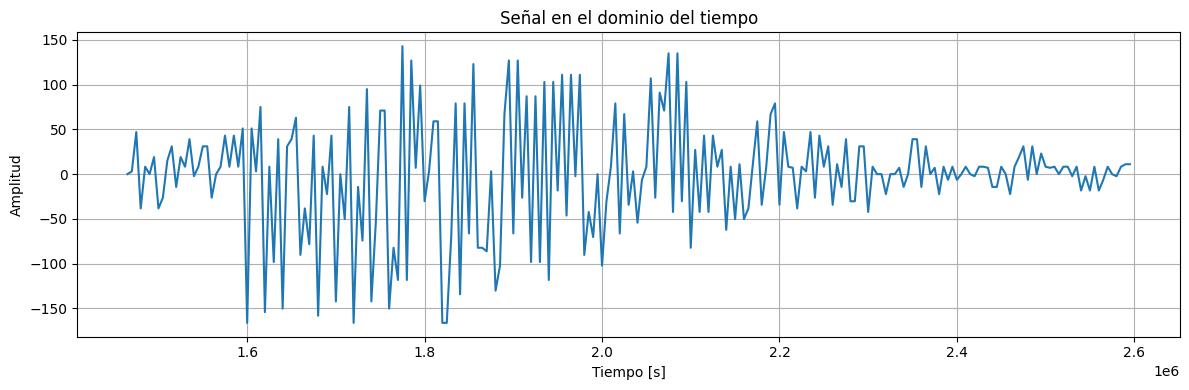

Frecuencia dominante: 0.000100 Hz


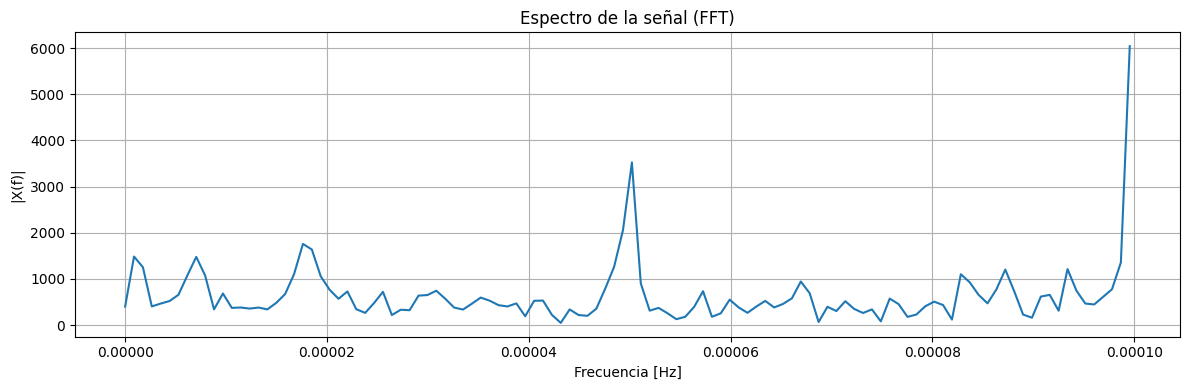

In [21]:
analizar_senal("/content/substracted_la1.csv")

# ***Pulse***

## calibrate_p1

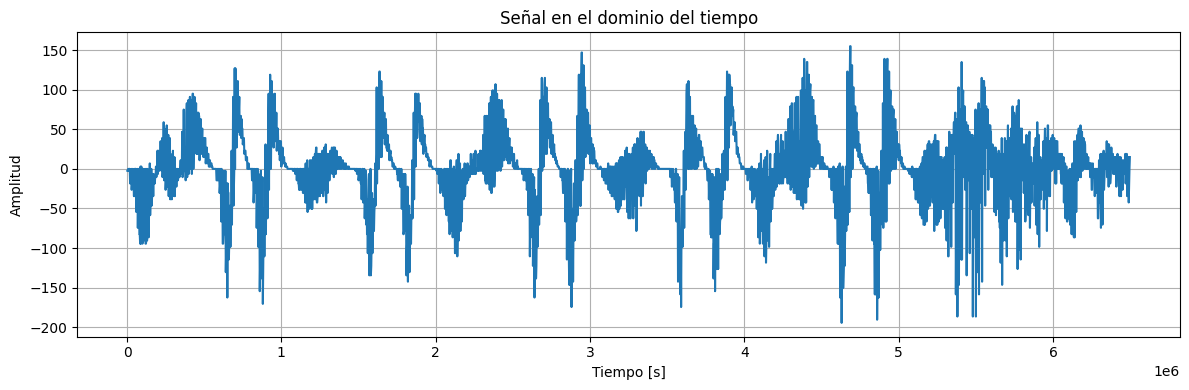

Frecuencia dominante: 0.000100 Hz


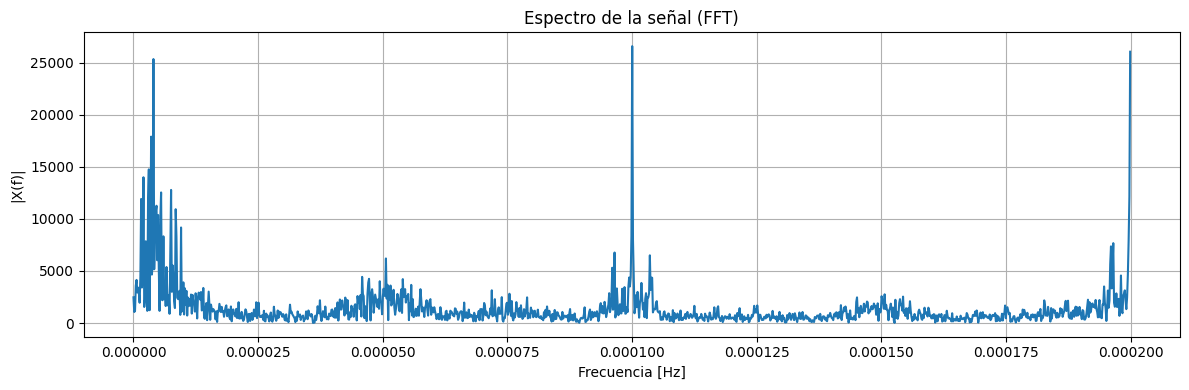

In [22]:
analizar_senal("/content/calibrate_p1.csv")

## calibrate_p2

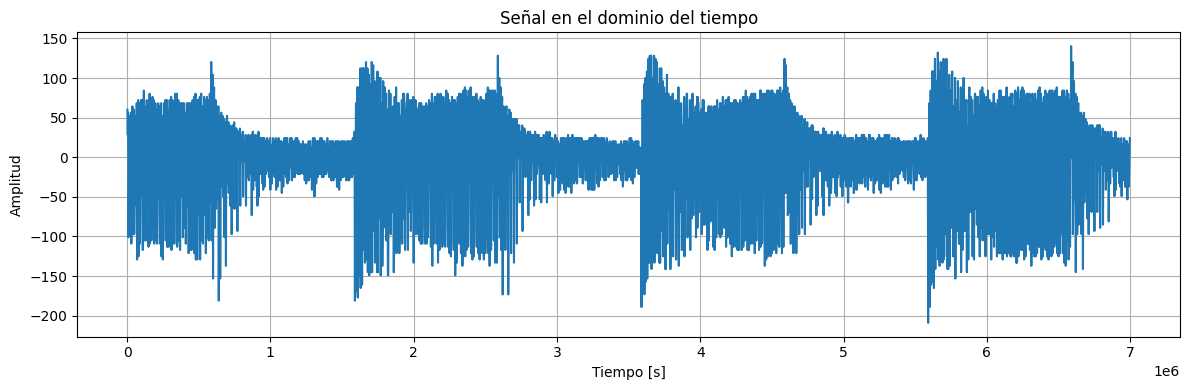

Frecuencia dominante: 0.000100 Hz


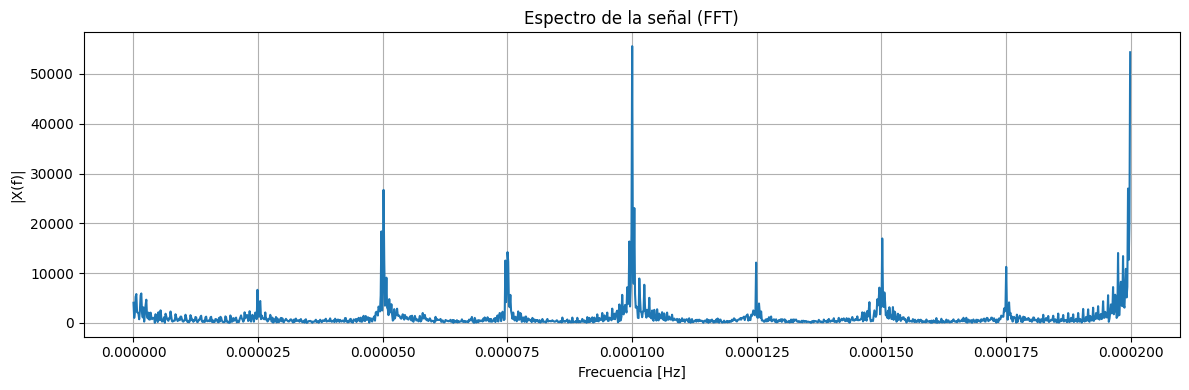

In [23]:
analizar_senal("/content/calibrate_p2.csv")

# ***sin***

## calibrate_sin01

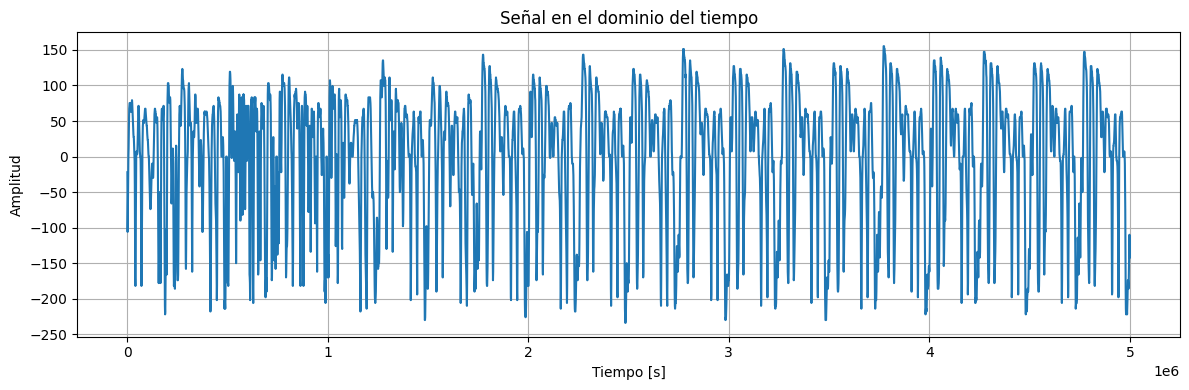

Frecuencia dominante: 0.000016 Hz


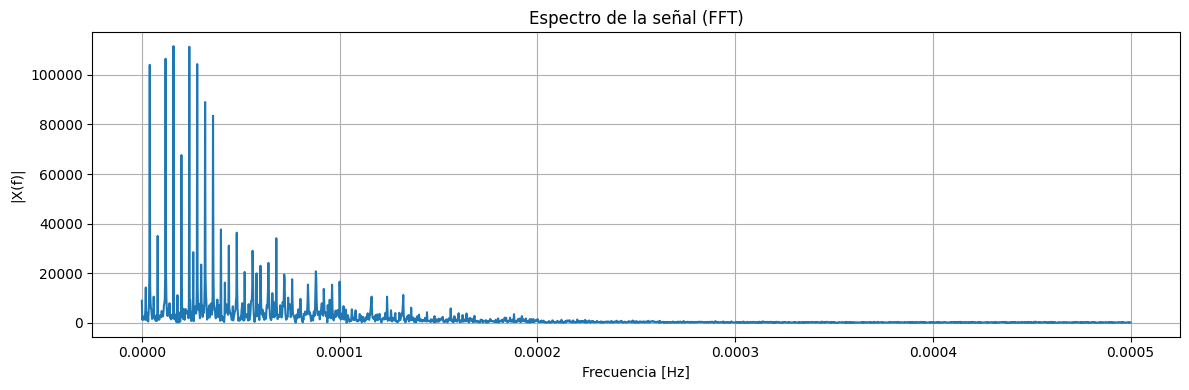

In [24]:
analizar_senal("/content/calibrate_sin01.csv")

## calibrate_sin1

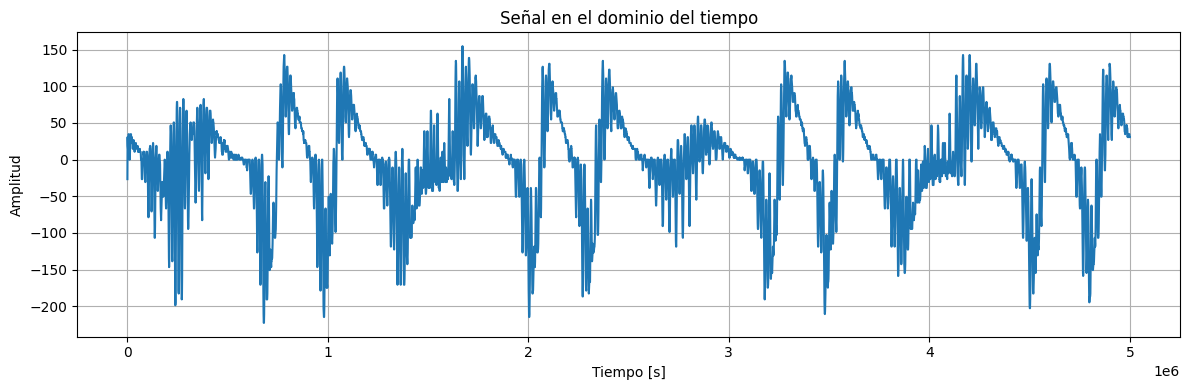

Frecuencia dominante: 0.000003 Hz


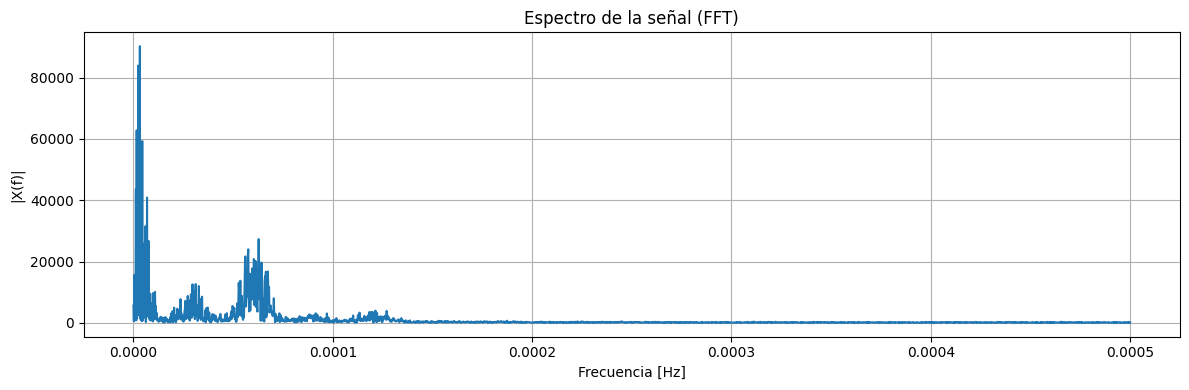

In [25]:
analizar_senal("/content/calibrate_sin1.csv")

## calibrate_sin2

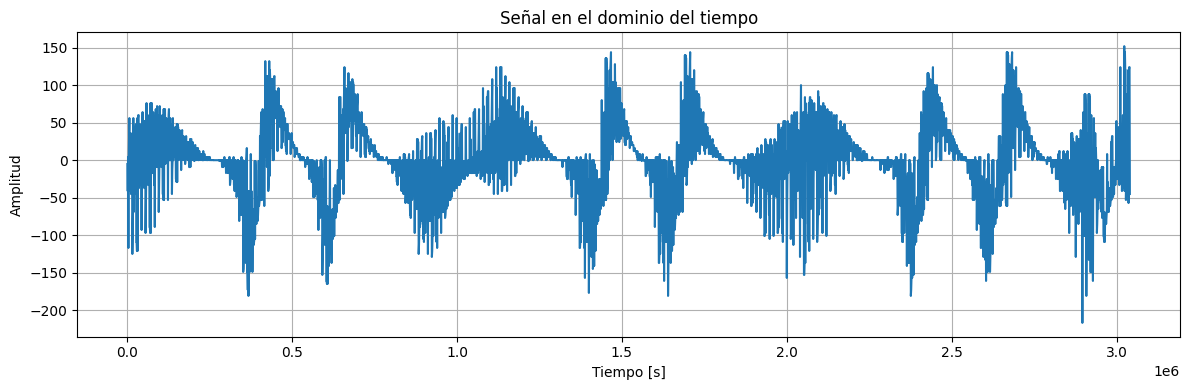

Frecuencia dominante: 0.000500 Hz


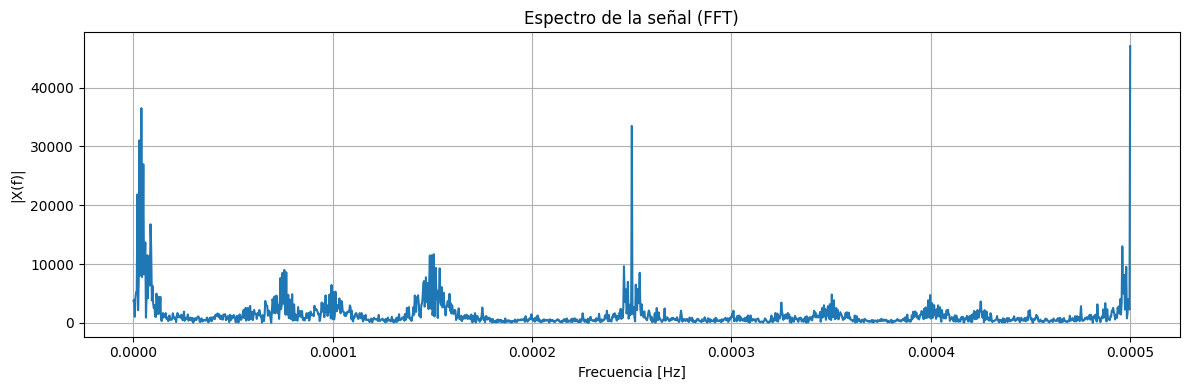

In [26]:
analizar_senal("/content/calibrate_sin2.csv")

## calibrate_sin05

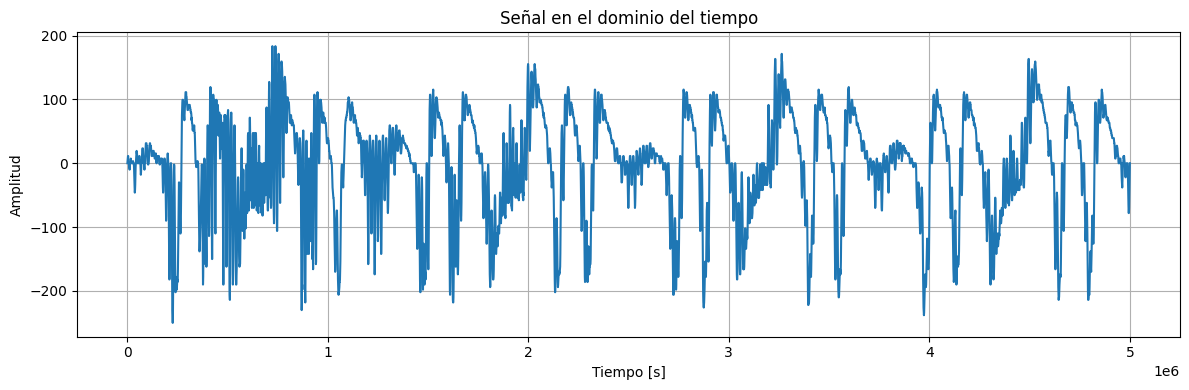

Frecuencia dominante: 0.000006 Hz


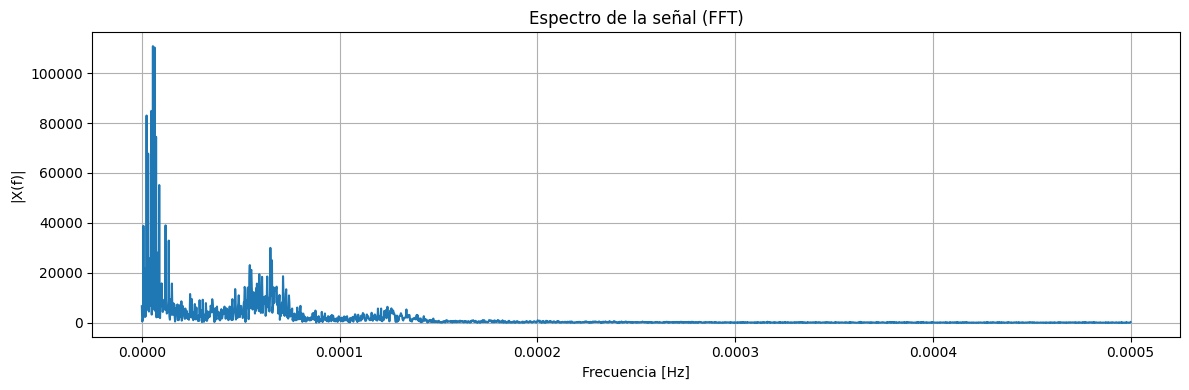

In [27]:
analizar_senal("/content/calibrate_sin05.csv")

## calibrate_sin10

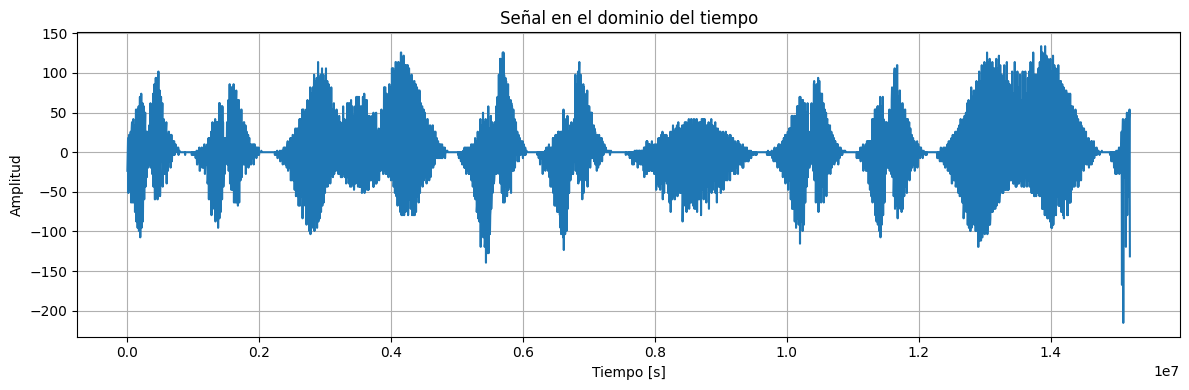

Frecuencia dominante: 0.000100 Hz


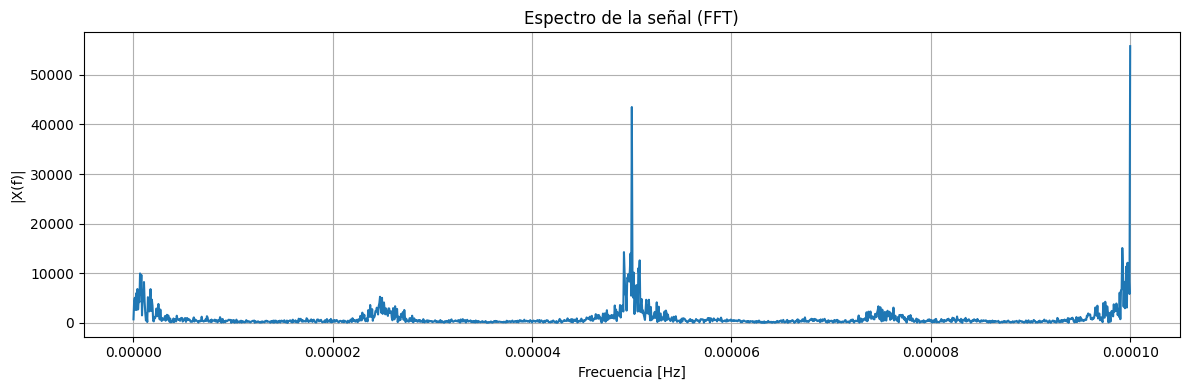

In [28]:
analizar_senal("/content/calibrate_sin10.csv")